In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import QuantileRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
# Load the California housing dataset
california_housing = fetch_california_housing()

In [3]:
# Split the data into features and target
X = california_housing.data
y = california_housing.target

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Fit Quantile Regression models for different quantiles
quantiles = [0.1, 0.5, 0.9]  # Quantiles to estimate
quantile_regs = {}
for quantile in quantiles:
    quantile_reg = QuantileRegressor(quantile=quantile)
    quantile_reg.fit(X_train, y_train)
    quantile_regs[quantile] = quantile_reg

In [6]:
# Make predictions for each quantile
y_preds = {quantile: quantile_reg.predict(X_test) for quantile, quantile_reg in quantile_regs.items()}

In [7]:
# Calculate mean absolute error for each quantile
mae = {quantile: mean_absolute_error(y_test, y_pred) for quantile, y_pred in y_preds.items()}
print("Mean Absolute Error:")
for quantile, mae_value in mae.items():
    print(f"Quantile {quantile}: {mae_value}")

Mean Absolute Error:
Quantile 0.1: 1.2613264134564615
Quantile 0.5: 0.8740504757141665
Quantile 0.9: 1.9063391335795117


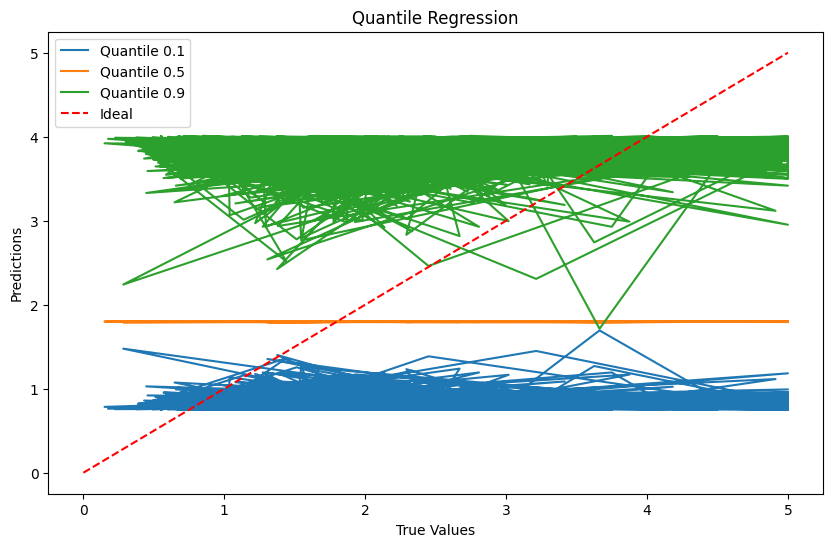

In [8]:
# Plot the results
plt.figure(figsize=(10, 6))
for quantile, y_pred in y_preds.items():
    plt.plot(y_test, y_pred, label=f'Quantile {quantile}', linestyle='-')
plt.plot([0, 5], [0, 5], color='red', linestyle='--', label='Ideal')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Quantile Regression')
plt.legend()
plt.show()